# Time Analysis 

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')
housing_extended

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285035,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,hardcover,steel-concrete composite,0.500,has elevator,no subway,3,20.402633,2649.031297
285036,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete composite,0.333,no elevator,no subway,3,20.402633,2057.976127
285037,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete composite,0.222,has elevator,has subway,3,12.983181,3100.598461
285038,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,Simplicity,steel-concrete composite,0.500,has elevator,no subway,3,13.519291,3513.751590


In [107]:
housing_extended_copy=housing_extended.copy()
housing_extended_copy['elevator'] = housing_extended_copy['elevator'].replace("has elevator", 1)
housing_extended_copy['elevator'] = housing_extended_copy['elevator'].replace("no elevator", 0)
districts_df=housing_extended.groupby(['district'],as_index=False)['pricePerSquare'].mean()
districts_df.index=districts_df['district']
districts_df.drop(columns=['district'],inplace=True)
districts_df.rename(columns={'pricePerSquare':'pricePerSquare mean'},inplace=True)

districts_df["% houses with elevator"]=housing_extended_copy.groupby(['district'])['elevator'].apply(lambda x: (x==1).mean()*100)
housing_extended_copy['subway'] = housing_extended_copy['subway'].replace("has subway", 1)
housing_extended_copy['subway'] = housing_extended_copy['subway'].replace("no subway", 0)
districts_df["% houses with subway"]=housing_extended_copy.groupby(['district'])['subway'].apply(lambda x: (x==1).mean()*100)

districts_df["square mean"]=housing_extended_copy.groupby(['district'])['square'].apply(lambda x: x.mean())
districts_df["building age mean"]=housing_extended_copy.groupby(['district'])['constructionTime'].apply(lambda x: (2021-x).mean())
districts_df["frequent buildingStructure"]=housing_extended_copy.groupby(['district'])['buildingStructure'].apply(lambda x: x.value_counts().idxmax())




C:\Users\Asus\AppData\Local\Temp\ipykernel_17016\854257723.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_extended_copy['elevator'] = housing_extended_copy['elevator'].replace("no elevator", 0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17016\854257723.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_extended_copy['subway'] = housing_extended_copy['subway'].replace("no subway", 0)


In [108]:
housing_extended['tradeTime'] = pd.to_datetime(housing_extended['tradeTime'])
housing_extended.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


###  Step 1: Validating the Price Decline Hypothesis

Local residents believe that housing prices have been declining for several months and may continue to drop. In this step, we examine the data through time series analysis to assess the validity of this assumption.


C:\Users\Asus\AppData\Local\Temp\ipykernel_17016\2770883032.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='M', on='tradeTime')['pricePerSquare'].mean().plot(ax=ax1, color = 'crimson').set_title('pricePerSquare over time')


Text(0, 0.5, 'pricePerSquare')

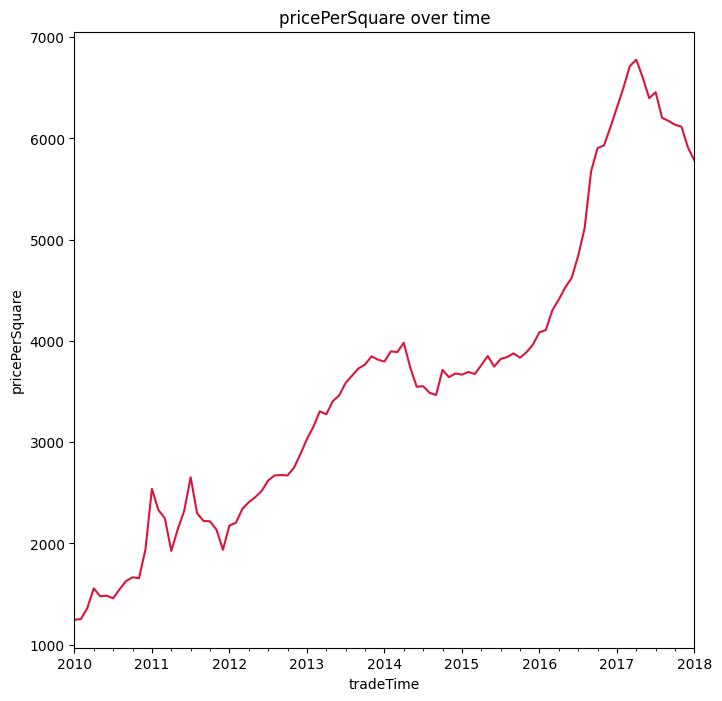

In [ ]:

fig1 , ax1 = plt.subplots()
fig1.set_size_inches(8,8)

housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='M', on='tradeTime')['pricePerSquare'].mean().plot(ax=ax1, color = 'crimson').set_title('pricePerSquare over time')
ax1.set_ylabel('pricePerSquare');

### Step 3: Analyzing the Decline in Transaction Volume Near the City Center

In this step, we investigate the widely discussed assumption that the volume of housing transactions has been steadily decreasing in areas close to the city center. Building upon the previous time series visualization, we adapt the analysis to reflect the frequency of transactions over time, enabling a more precise assessment of spatial-temporal market dynamics.


C:\Users\Asus\AppData\Local\Temp\ipykernel_17016\2876783232.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='3M', on='tradeTime')['distanceToCapital'].apply(lambda x: x[x < 15].count()).plot(ax=ax2, color = 'orange').set_title('center city house trades over time')


Text(0, 0.5, 'frequency')

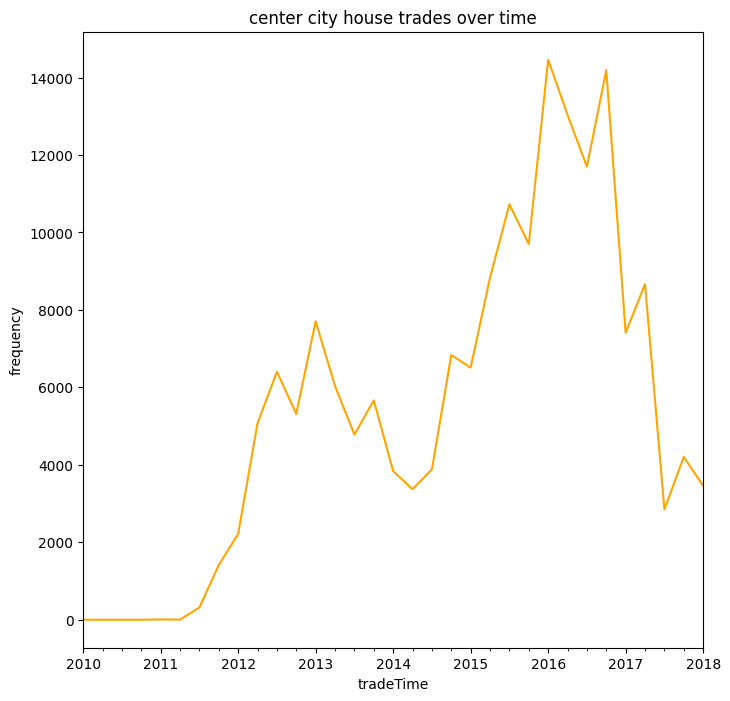

In [111]:

fig2 , ax2 = plt.subplots()
fig2.set_size_inches(8,8)

housing_extended.loc[housing_extended.tradeTime >= '2010'].resample(rule='3M', on='tradeTime')['distanceToCapital'].apply(lambda x: x[x < 15].count()).plot(ax=ax2, color = 'orange').set_title('center city house trades over time')
ax2.set_ylabel('frequency')